__Candidate Name: Harshada Patke__

### 1. Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

### 2. Exploratory Data Analysis

In [2]:
car_data = pd.read_csv("USA_cars_datasets.csv")
car_data.drop(columns = "Unnamed: 0", axis =1, inplace= True)

In [3]:
print("------Information about the car dataset------")
car_data.info()

------Information about the car dataset------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2499 non-null   int64  
 1   brand         2499 non-null   object 
 2   model         2499 non-null   object 
 3   year          2499 non-null   int64  
 4   title_status  2499 non-null   object 
 5   mileage       2499 non-null   float64
 6   color         2499 non-null   object 
 7   vin           2499 non-null   object 
 8   lot           2499 non-null   int64  
 9   state         2499 non-null   object 
 10  country       2499 non-null   object 
 11  condition     2499 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 234.4+ KB


In [4]:
rows,columns = car_data.shape
print("No. of Columns =",columns,"\nNo. of Rows =", rows)

No. of Columns = 12 
No. of Rows = 2499


### 2.1 Country

In [5]:
car_data.groupby('country')['model'].count().reset_index().sort_values('model',ascending = False)

country  model
1      usa   2492
0   canada      7

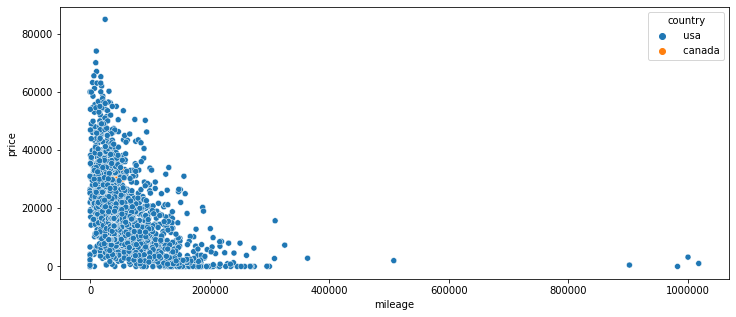

In [6]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=car_data, x="mileage", y="price", hue="country")
plt.ticklabel_format(style='plain', axis='x')

We can see in above plot, because country there is no such diffrence on price and mileage, so we can remove it and also dropping LOT and VIN column becuase both are unique identification numbers of cars which might not be useful to detect the price of the car.

In [7]:
car_data.drop(['vin', 'lot','country'], axis=1, inplace=True)

__We have 3 Numerical features: price, year and mileage and 6 categorical features.__

### 2.2 Title Status

In [8]:
car_data[['price','title_status']].groupby('title_status').agg(['mean','count'])

price      
                           mean count
title_status                         
clean vehicle      19914.439640  2336
salvage insurance   2333.006135   163

We do not have many salvage cars in the dataset but it is a must-have feature with the remarkable price difference

### 2.3 Colour

In [9]:
car_data.color.value_counts()[:6].sum() / len(car_data)

0.9047619047619048

There are 49 different colors but 90% of cars belong to 6 different colors. We can mark the remaining colors as other like we did in “brand” column

In [10]:
cars_per_color = car_data.groupby('color')['model'].count().reset_index().sort_values('model',ascending = False).head(6)
cars_per_color = cars_per_color.rename(columns = {'model':'count'})
fig = px.bar(cars_per_color, x='color', y='count', color='count')
fig.show()

In [11]:
other_colors = car_data.color.value_counts().index[6:]
car_data.color = car_data.color.replace(other_colors, 'other_colors')

In [12]:
sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
sns.boxplot(x='color', y='price', data=car_data).set_title("Color vs Price")

Text(0.5, 1.0, 'Color vs Price')

from above plots we can say that, there are outliers in the data which are above 45000 in price.

### 2.4 Brand

In [521]:
cars_per_brand = car_data.groupby('brand')['model'].count().reset_index().sort_values('model',ascending = False)
cars_per_brand = cars_per_brand.rename(columns = {'model':'count'})
fig = px.bar(cars_per_brand, x='brand', y='count', color='count')
fig.show()

From above plot, we can say that ford model purchased by most of the customers.

###  2.5 State

In [522]:
cars_per_state = car_data.groupby('state')['model'].count().reset_index().sort_values('model',ascending = False)
cars_per_state = cars_per_state.rename(columns = {'model':'count'})
fig = px.bar(cars_per_state, x='state', y='count', color='count')
fig.show()

### 2.6 Price, Year and Milage

Now, we will check distribustion of numerical features

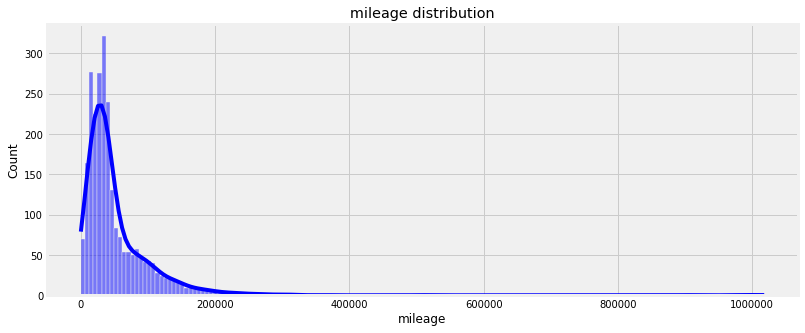

In [177]:
for feature in ['price','year','mileage']:
    plt.figure(figsize=(12, 5))
    sns.histplot(car_data[feature],color='blue',kde=True)
    plt.ticklabel_format(style='plain', axis='x')
    plt.title(f"{feature} distribution")
    plt.show()

<ul>
<li>as per the above plots, all distribustions are positive or negativly skewed. </li>

<li>By noticing the price distribution which is positivly skewed, we can see few car records have 0 price values that is not possible in real scenarios so we need to replace 0 with median of price columns. </li>
    
<li> Same above logic applies to mileage column also. </li>

</ul>

### 2.7 Average Price and Average Milegae per year

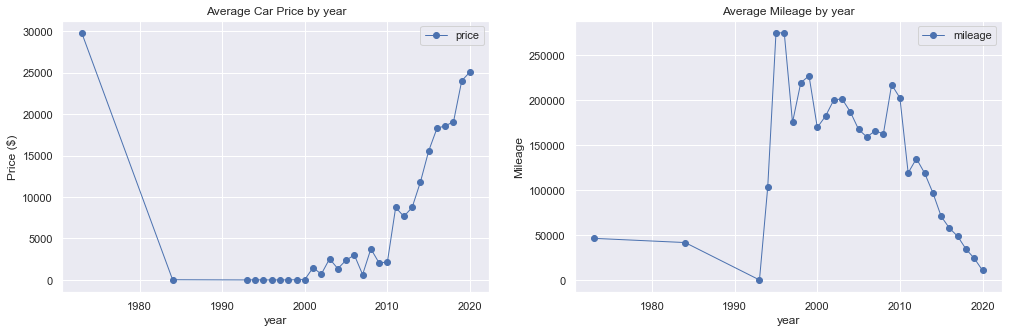

In [523]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
car_data.groupby('year').agg({'price':'mean'}).plot(kind='line', marker='o', linewidth=1, ax=ax[0])
car_data.groupby('year').agg({'mileage':'mean'}).plot(kind='line', marker='o', linewidth=1, ax=ax[1])
ax[0].set_title('Average Car Price by year')
ax[1].set_title('Average Mileage by year')
ax[0].set_ylabel('Price ($)')
ax[1].set_ylabel('Mileage')
plt.show()

2 Insights:
<ul> 
    <li>Average price of a car model decreases with the age of the car. </li>
    <li>Average mileage of a car seems to decrease almost linearly with the age of the car</li>
</ul>

### 3. Feature Extraction

In [422]:
def convert_day_to_min(time):
    return int(time)*1440

def convert_hours_to_min(time):
    return int(time)*60

In [426]:
car_data['value']= car_data['condition'] .str.split(' ').str[0]
car_data['days']= car_data['condition'] .str.split(' ').str[1]

In [427]:
temp_data = pd.concat([car_data[car_data['days']=='days']['value'].apply(convert_day_to_min),
            car_data[car_data['days']=='hours']['value'].apply(convert_hours_to_min),
            car_data[car_data['days']=='minutes']['value'].astype(int)]).rename('Minutes left',inplace=True)

In [428]:
clean_car_data = pd.concat([car_data,temp_data],axis=1)

clean_car_data.drop(['condition','value','days'],axis=1,inplace=True)

In [429]:
clean_car_data.head()

price      brand    model  year   title_status   mileage         color  \
0   6300     toyota  cruiser  2008  clean vehicle  274117.0         black   
1   2899       ford       se  2011  clean vehicle  190552.0        silver   
2   5350      dodge      mpv  2018  clean vehicle   39590.0        silver   
3  25000       ford     door  2014  clean vehicle   64146.0  other_colors   
4  27700  chevrolet     1500  2018  clean vehicle    6654.0           red   

        state  Minutes left  
0  new jersey       14400.0  
1   tennessee        8640.0  
2     georgia        2880.0  
3    virginia        1320.0  
4     florida        1320.0

### 4.  Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

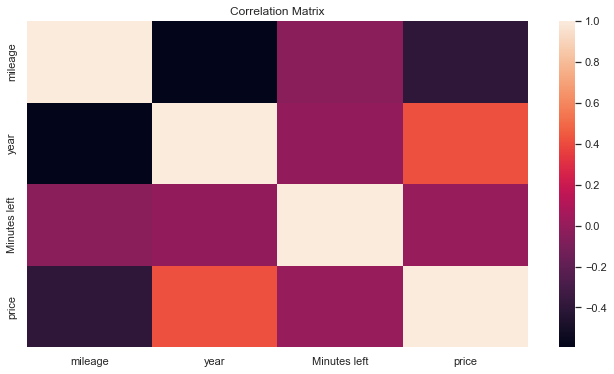

In [437]:
corr = clean_car_data[['mileage','year', 'Minutes left','price']].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr).set_title('Correlation Matrix')

### 5. Data Preprocessing

In [505]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [526]:
#sorting out Numerical and Categorical features
numerical = clean_car_data.drop('price', axis=1).select_dtypes(include=np.number).columns
categorical = clean_car_data.drop('price', axis=1).select_dtypes(include=['object']).columns

X = clean_car_data.drop('price', axis=1)
y = clean_car_data['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [527]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('one_hot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical),
        ('cat', categorical_transformer, categorical)
    ])

### 6. Model Building

In [529]:
results = pd.DataFrame(columns=['Name', 'Scores On Test Dataset'])

for model in [
    LinearRegression, 
    KNeighborsRegressor,
    DecisionTreeRegressor,
    RandomForestRegressor, 
    GradientBoostingRegressor,
    XGBRegressor

]:
    pipe = make_pipeline(preprocessor, model())
    
    temp_model= pipe.fit(X_train, y_train)
    
    y_pred = temp_model.predict(X_test)
    
    scores = temp_model.score(X_test, y_test)
    
    results = results.append({
        'Name' : model.__name__, 
        'Scores On Test Dataset' : round(scores, 3) }, ignore_index=True)
       
    del pipe
    
    print('Processing  {} Model.'.format(model.__name__))
print('Completed!')
results = results.sort_values('Scores On Test Dataset', ascending=False)

Processing  LinearRegression Model.
Processing  KNeighborsRegressor Model.
Processing  DecisionTreeRegressor Model.
Processing  RandomForestRegressor Model.
Processing  GradientBoostingRegressor Model.
Processing  XGBRegressor Model.
Completed!


### 7.  Result On Test Dataset

In [530]:
results

Name  Scores On Test Dataset
5               XGBRegressor                   0.739
3      RandomForestRegressor                   0.721
0           LinearRegression                   0.678
4  GradientBoostingRegressor                   0.666
1        KNeighborsRegressor                   0.662
2      DecisionTreeRegressor                   0.602

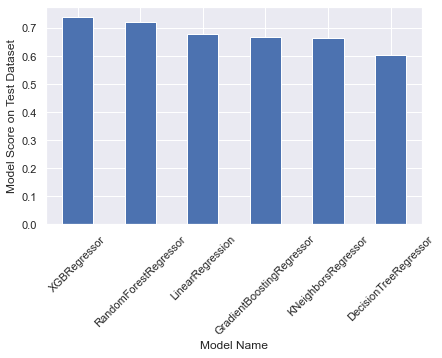

In [535]:
results.set_index('Name')['Scores On Test Dataset'].plot(kind='bar')
plt.xlabel('Model Name')
plt.ylabel('Model Score on Test Dataset')
plt.xticks(rotation=45)
plt.show()